In [1]:
from google.colab import files
uploaded = files.upload()

Saving carmichael.csv to carmichael.csv


# Problema: Hagámosle competencia a Amason Prime ###

En este ejercicio vamos a tratar de introducirnos en el lucrativo mercado de los números primos. Como dominamos las mates, hemos decidido que reduciremos costes vendiendo una proporción de números que no son primos pero que lo parecen, los llamados números de Carmichael, entre cuyas hazañas destaca la de engañar al mismísimo Pierre de Fermat. El fichero `carmichael.csv` refleja los resultados de una encuesta de satisfacción realizada a los consumidores en función de si el número mandado es un verdadero primo, un número claramente compuesto o un número de Carmichael.

Propón un plan para determinar si los números de Carmichael están resultando aceptables para los consumidores y lleva a cabo el análisis correspondiente. Defiende los resultados y la conveniencia o no de vender números de Carmichael.

## Objetivos 

* Determinar si los números de Carmichael están resultando aceptables para los consumidores. 
* Establecer la conveniencia de vender números de Carmichael. 

### Preguntas

1. Son los números de Carmichael aceptables para los consumidores?
2. Cuál número tiene el mejor nivel de satifacción entre los consumidores? 
3. Deberiamos vender números de Charmichael?

## Importar y analizar el dataset 

In [29]:
import io
import numpy as np
import pandas as pd
import seaborn as sns

path = io.BytesIO(uploaded['carmichael.csv'])
df = pd.read_csv(path, sep=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           3000 non-null   int64 
 1   number_type  3000 non-null   object
 2   score        3000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 70.4+ KB


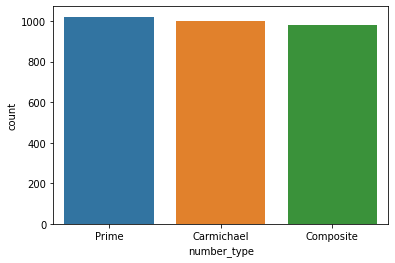

In [30]:
# Graficar los niveles de la variable catégorica. 
sns.countplot(x=df["number_type"])

In [31]:
#Check for unique numbers
print(df['score'].unique())

#Descriptive analysis
df.describe()

[ 7 10  1  0  9  8  4  6  2  5  3 -1 -3 -2 -4 -5 -6]


,ID,score
count,3000.000000,3000.000000
mean,1500.500000,6.729667
std,866.169729,3.256397
min,1.000000,-6.000000
25%,750.750000,5.000000
50%,1500.500000,8.000000
75%,2250.250000,10.000000
max,3000.000000,10.000000


**Observaciones**

*   El dataset carmichael.csv tiene 3 columnas y 3000 registros. 
*   Las columnas del dataset contienen la misma cantidad de datos. 
*   el dataset contiene dos columnas numericas y una columna number_type tipo catégorica. 
*   La columna number_type tiene tres clases Prime, Carmichael and Composite. 
*   El valor medio de satisfacción es de 6.73 puntos.
*   El valor mínimo de satisfacción es -6.0, lo cual indica que existen valores con datos incorrectos, ya que la escala de calificación deberia estar entre 0 y 10. Donde 0 significa que el cliente estaba extremadamente insatisfecho y 10 que estaba muy satisfecho.

Vamos a proceder a identificar la cantidad de scores negativos en el set de datos y tomar la decisión de filtrarlos del dataset para proceder con el análisis. 

In [32]:
#Get the total of negative scores.
print((df['score'] < 0).sum())

82


In [34]:
#Get the total of negative scores.
df_final = df[df['score'] >= 0]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2918 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2918 non-null   int64 
 1   number_type  2918 non-null   object
 2   score        2918 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 91.2+ KB


***Observaciones***

- Al analizar la columna "score" encontramos que existen 82 registros con puntuaciones negativas. 
- Dado que la escala de valoración va de 0 a 10, vamos a filtrar la columna score para excluir los 82 registros con valores negativos, esta operacion nos da un total de 2918 registros con los cuales vamos a realizar el análisis.

 ## Análisis Exploratorio del nivel de satisfacción 

In [37]:
grouped = df_final.groupby("number_type", as_index=False).agg({
    "score": ["mean", "count", "std", "median"]
}).sort_values(by=("score", "mean"), ascending=False)
grouped

number_type     score                       
                   mean count       std median
2       Prime  8.573947  1021  1.451729    9.0
0  Carmichael  7.558522   974  2.880306    9.0
1   Composite  4.604550   923  2.689390    5.0

### Visualizar los datos

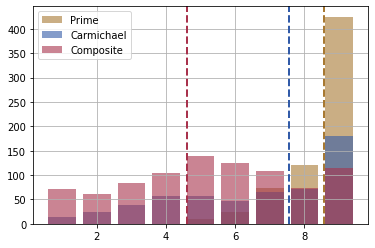

In [38]:
import matplotlib.pyplot as plt

PRIME = 'Prime'
CHARMICHAEL = 'Carmichael'
COMPOSITE = 'Composite'

dfPrime = df_final[df_final.number_type == PRIME].score
dfCarmichael = df_final[df_final.number_type == CHARMICHAEL].score
dfComposite = df_final[df_final.number_type == COMPOSITE].score

hPrime, bPrime = np.histogram(dfPrime, bins=np.arange(10))
hCarm, bCarm = np.histogram(dfCarmichael, bins=np.arange(10))
hComp, bComp = np.histogram(dfComposite, bins=np.arange(10))

cPrime = '#a87932'
cChar = '#325ba8'
cComp = '#a8324c'
plt.bar(bPrime[1:], hPrime, width=0.8, alpha=0.6, label=PRIME, color=cPrime)
plt.bar(bCarm[1:], hCarm, width=0.8, alpha=0.6, label=CHARMICHAEL, color=cChar)
plt.bar(bComp[1:], hComp, width=0.8, alpha=0.6, label=COMPOSITE, color=cComp)

plt.axvline(dfPrime.mean(), linestyle="--", color=cPrime, linewidth=2)
plt.axvline(dfCarmichael.mean(), linestyle="--", color=cChar, linewidth=2)
plt.axvline(dfComposite.mean(), linestyle="--", color=cComp, linewidth=2)
plt.grid()
plt.legend(loc="best")
plt.show()

- En el dataset tenemos los siguientes valores: 
    * Un total de 1021 números Prime con un media de nivel de satifacción de 8.574. 
    * Un total de 974 números Carmichael con un media de nivel de satisfacción de 7.559.
    * Un total de 923 números Composite con un media de nivel de satisfacción de 4.605.
    * En promedio, el valor de satisfacción para los numeros de Charmichael se desvia de la media de 7.559 aproximadamente 2.88 puntos. Esto nos indicaría que las opiniones de los consumidores de Carmichael tienen una mayor variación con respecto a los otros dos tipos de números.  
    * Los valores de las medianas parecen ser un mejor indicador para comparar que el valor de las medias. 
 
- El análisis exploratorio de los datos nos indica que los números PRIME tienen un mejor puntaje de satisfacción en comparación con los números de Carmichael y Composite. Para confirmar esta hipótesis debemos realizar hipótesis testing.

### Hipótesis Testing

Para responder a la pregunta: Son los números de Carmichael aceptables para los consumidores? debemos comparar los resultados de cada tipo de numero para establecer cual tiene mayor aceptación. 

Para verificar si existe alguna diferencia significativa entre los score de satisfación vamos a utilizar un test de U-Whitman con los siguientes hipótesis para comparar el score de los Prime vs. Charmichael, Prime vs. Composite y Composite vs. Charmichael. 

Si el p-value que obtenemos en el test es menor que $\alpha = 0.05$ podemos rechazar la hipótesis Nula y decir que existe una diferencia significativa. 

$$
H_0: \mu Prime  = \mu  Charmichael \\ 
H_1: \mu Prime  \neq \mu Charmichael  \\ 
$$

$$
H_0: \mu Prime  = \mu  Composite \\ 
H_1: \mu Prime  \neq \mu Composite  \\ 
$$

$$
H_0: \mu Composite  = \mu  Charmichael \\ 
H_1: \mu Composite  \neq \mu Charmichael  \\ 
$$
$$
\alpha = 0.05
p-value < 0.05 = Rechazar H_0
$$

### Test de U-Whitmann

In [39]:
from scipy.stats import mannwhitneyu

print(mannwhitneyu(dfPrime, dfCarmichael))
print(mannwhitneyu(dfPrime, dfComposite))
print(mannwhitneyu(dfComposite, dfCarmichael))

MannwhitneyuResult(statistic=546818.0, pvalue=6.39011396144301e-05)
MannwhitneyuResult(statistic=839538.0, pvalue=1.221210940053702e-198)
MannwhitneyuResult(statistic=203109.5, pvalue=1.0930383936199548e-96)


#### Análisis test de U-Whitmann

Los p-values del test de U-Whitmann son menores que el nivel de significancia por lo tanto, podemos decir que existe una diferencia entre los puntajes de satisfacción para cada tipo de número, sin embargo no sabemos con certeza cual es mejor.  

**Conclusiones:** 

* Los números PRIME tienen mejor puntaje de satisfacción en comparación con los números de Charmichael y Composite. 
* Los números CARMICHAEL tienen mejor puntaje de satisfacción que los números Composite. 
* Al parecer los números PRIME tienen mejor desempeño entre los consumidores, sin embargo para poder establecer mejor las diferencias vamos a realizar un test HSD de Tukey que compare todas las muestras a la vez y poder clusterizar los resultados. 

### Test HSD de Tukey.

In [40]:
import statsmodels.stats.multicomp as multi 

number_type_score = multi.MultiComparison(df.score, df.number_type)
results = number_type_score.tukeyhsd()

print(results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2  meandiff p-adj  lower   upper  reject
----------------------------------------------------------
Carmichael Composite  -3.1102 0.001 -3.3942 -2.8261   True
Carmichael     Prime   1.2556 0.001  0.9745  1.5368   True
 Composite     Prime   4.3658 0.001  4.0833  4.6483   True
----------------------------------------------------------


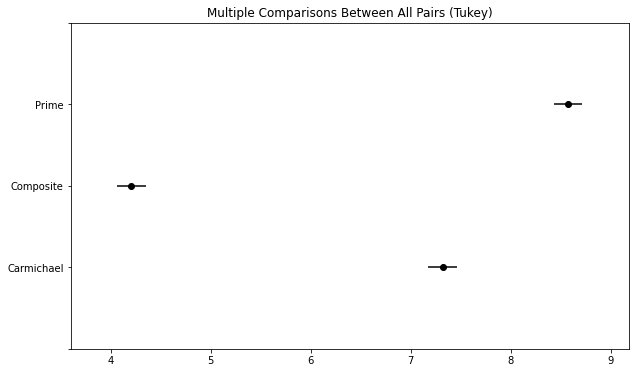

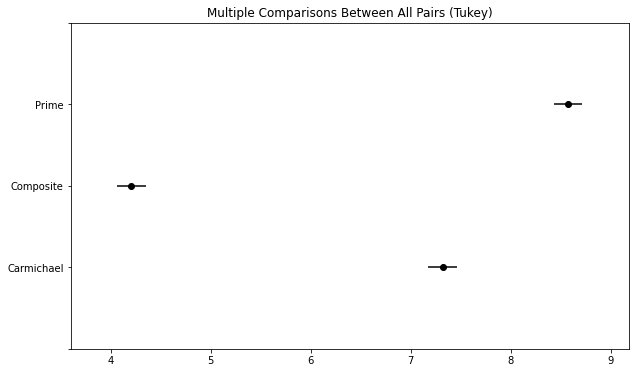

In [41]:
results.plot_simultaneous()

## Conclusión

El test de Tukey nos confirma el resultado del test de U-Whitman, y nos indica que existen diferencias significas entre el puntaje de satisfacción y además nos muestra las comparaciones entre grupos por lo cual podemos concluir:

- Los números PRIME tienen un mayor nivel de satisfacción entre los consumidores. 
- Los números de CARMICHAEL se ubican en segundo lugar con un diferencia de la media en el score de 1.0154 en comparación con los números PRIME. 
- Los números COMPOSITE tienen el peor nivel de satisfacción en comparación con los otros dos tipos de números. 

Para concluir podemos responder a las preguntas planteadas lo siguiente:

- **Son los números de Carmichael aceptables para los consumidores?**

Los números de Carmichael no son aceptables para los consumidores, ya que el score de satisfacción más alto lo tienen los números PRIME.  Sin embargo la diferencia entre los puntajes de satisfacción entre Carmichael y Prime es de 1.0154 puntos.   

- **Cuál número tiene el mejor nivel de satifacción entre los consumidores?** 

Los PRIME tienen mejor nivel de satifacción. 

- **Deberiamos vender números de Carmichael?**

Los números de Carmichael no tienen un nivel de satisfacción tan bajo entre los consumidores, de hecho hemos concluido que están en segundo lugar con una diferencia de 1.0154 con respecto a los números PRIME. Por lo tanto la decisión de vender o no estos números debe estar condicionada a los objetivos de la empresa referentes a nivel de satisfacción que quiere tener entre los consumidores y el nivel de calidad con el cuál quiere ser percibido.  

También tendriamos que considerar los costes de producción de los números PRIME en comparación con los números de Carmichael y el target market que tiene la empresa, si el objetivo es ofrecer un producto similar a los números PRIME con un menor precio en este escenario podrían considerar vender los números de Carmichael, pero si el objetivo es compertir con la calidad de los números PRIME en este escenario no deberian seguir invirtiendo en producir los números de Carmichael. 